# Лабораторная работа №2:

In [ ]:
Задание: Вторичный рынок машин.
1. Удалите столбцы, ценность которых для оценки стоимости машины низка.
2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.
3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.
4. Заполнить пропущенные данные в строковых полях.
5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.
6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.
7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.
8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.
9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [1]:
import numpy as np

In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [4]:
info_data = pd.read_csv('info.csv', sep = ',')
info_data #вывод файла info.csv

,count,km,year,powerPS,minPrice,maxPrice,avgPrice,sdPrice
0,19,125000,1991,40,300,1499,648.3158,352.035293
1,69,150000,1991,40,110,1600,516.4348,346.767661
2,11,90000,1991,60,330,10000,2342.4545,3017.432333
3,26,100000,1991,60,200,8750,1392.3846,1598.662833
4,42,125000,1991,60,150,4600,1140.6429,1010.314138
...,...,...,...,...,...,...,...,...
1765,24,20000,2015,260,25490,73000,49492.3750,17182.173184
1766,16,10000,2015,300,699,60000,38542.6875,12924.901241
1767,25,20000,2015,300,487,82700,39683.3200,13065.072294
1768,22,10000,2015,320,33000,68450,50372.6364,10736.265072


In [5]:
auto_data = pd.read_csv('autos.csv', encoding = 'iso-8859-1')
auto_data_copy = auto_data
auto_data_copy #вывод файла autos.csv

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


## Задание 1: Удалите столбцы, ценность которых для оценки стоимости машины низка.

In [6]:
clear_auto_data = auto_data.drop(['seller', 'offerType', 'abtest', 'nrOfPictures', 'lastSeen'], axis='columns') #удаление столбцов
auto_data_copy = clear_auto_data 
auto_data_copy

,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
0,2016-03-24 11:52:17,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,39576
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,26135
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,87439
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,40764


# Задание 2: Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

In [7]:
start_size = len(auto_data_copy)
auto_data_copy.drop_duplicates(keep = 'first', inplace = True) #удаление дубликатов
auto_data_copy.dropna(inplace = True) #удаление строк с пустыми значениями
end_size = len(auto_data_copy)
auto_data_copy

,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,19348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,96465
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,1150,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27 00:00:00,26624
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,26135
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,87439


In [8]:
print("Start size: ", start_size)
print("Difference: ", start_size - end_size) 
print("Total cars: ", end_size)

Start size:  371528
Difference:  110582
Total cars:  260946


# Задание 3: Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.

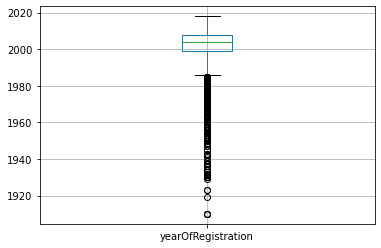

In [9]:
boxplot_year = auto_data_copy.boxplot(column = ['yearOfRegistration'])

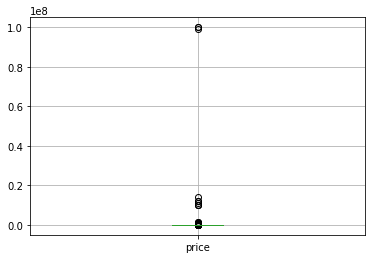

In [10]:
boxplot_price = auto_data_copy.boxplot(column = ['price'])

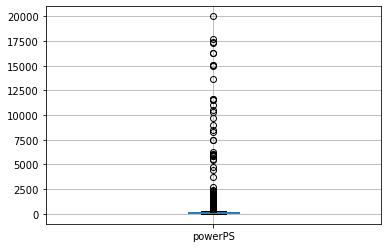

In [11]:
boxplot_powerPS = auto_data_copy.boxplot(column = ['powerPS'])

In [12]:
start_size = len(auto_data_copy)
auto_data_copy = auto_data_copy[(auto_data_copy.yearOfRegistration <= 2015)&(auto_data_copy.yearOfRegistration >= 1940)
&(auto_data_copy.price <= 200000)&(auto_data_copy.price >= 1000)
&(auto_data_copy.powerPS <= 2500)&(auto_data_copy.powerPS >= 50)]
end_size = len(auto_data_copy)
auto_data_copy

,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,57290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371517,2016-03-28 13:48:07,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,manuell,140,golf,150000,7,diesel,volkswagen,nein,2016-03-28 00:00:00,75223
371520,2016-03-19 19:53:49,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,96465
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,26135
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,87439


In [13]:
print("Start size: ", start_size)
print("Difference: ", start_size - end_size)
print("Total cars: ", end_size)

Start size:  260946
Difference:  48933
Total cars:  212013


# Задание 4: Заполнить пропущенные данные в строковых полях.

In [14]:
duplicates = auto_data
duplicates.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [15]:
duplicates['vehicleType'].fillna(value = 'NoInfo', inplace = True)
duplicates['gearbox'].fillna(value = 'NoInfo', inplace = True)
duplicates['model'].fillna(value = 'NoInfo', inplace = True)
duplicates['fuelType'].fillna(value = 'NoInfo', inplace = True)
duplicates['notRepairedDamage'].fillna(value = 'NoInfo', inplace = True)
duplicates.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [16]:
duplicates[(duplicates.vehicleType == 'NoInfo')]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NoInfo,1993,manuell,0,golf,150000,0,benzin,volkswagen,NoInfo,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
16,2016-04-01 12:46:46,Polo_6n_1_4,privat,Angebot,300,test,NoInfo,2016,NoInfo,60,polo,150000,0,benzin,volkswagen,NoInfo,2016-04-01 00:00:00,0,38871,2016-04-01 12:46:46
22,2016-03-23 14:52:51,Opel_Meriva_1.Hand_TÜV_3.2018,privat,Angebot,2900,test,NoInfo,2018,manuell,90,meriva,150000,5,benzin,opel,nein,2016-03-23 00:00:00,0,49716,2016-03-31 01:16:33
26,2016-03-10 19:38:18,Citroen_C4_Grand_Picasso.,privat,Angebot,5555,control,NoInfo,2017,manuell,125,c4,125000,4,NoInfo,citroen,nein,2016-03-10 00:00:00,0,31139,2016-03-16 09:16:46
31,2016-03-29 16:57:02,Renault_clio_1.2_TÜV_07/2016,privat,Angebot,899,control,NoInfo,2016,manuell,60,clio,150000,6,benzin,renault,NoInfo,2016-03-29 00:00:00,0,37075,2016-03-29 17:43:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371504,2016-03-07 17:06:35,220_cdi_Benz,privat,Angebot,2600,control,NoInfo,2005,automatik,0,c_klasse,150000,9,NoInfo,mercedes_benz,NoInfo,2016-03-07 00:00:00,0,61169,2016-03-08 21:28:38
371509,2016-03-11 23:40:32,LT_35_DIESEL_Gruene_Plakette....letzte_Gelegen...,privat,Angebot,1900,test,NoInfo,2000,manuell,110,NoInfo,150000,7,NoInfo,volkswagen,nein,2016-03-11 00:00:00,0,87700,2016-03-12 14:16:51
371519,2016-03-09 13:37:43,Alfa_Romeo_159_Jtdm_1.9_150_ps_13_600_km_top_voll,privat,Angebot,5250,control,NoInfo,2016,automatik,150,159,150000,12,NoInfo,alfa_romeo,nein,2016-03-09 00:00:00,0,51371,2016-03-13 01:44:13
371522,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,0,control,NoInfo,2005,manuell,0,colt,150000,7,benzin,mitsubishi,ja,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49


# Задание 5: Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.

In [17]:
group = auto_data_copy.groupby('fuelType')
fuel_bins = len(group.sum())
group.sum()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
fuelType,,,,,,
andere,152229,60046,6004,3560000,174,1263755
benzin,861789174,255563531,16707127,14719205000,787384,6697977795
cng,2201755,824799,44591,51960000,2710,20245236
diesel,781390956,161420894,11773661,10422375000,521021,4250458318
elektro,286908,54250,3746,1850000,173,1586515
hybrid,2804014,381967,23193,14485000,1299,9721118
lpg,16454088,6671175,542417,472405000,20962,157783084


<AxesSubplot:>

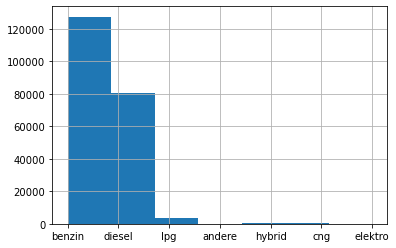

In [18]:
auto_data_copy.fuelType.hist(bins = fuel_bins)

In [19]:
group = auto_data_copy.groupby('vehicleType')
vehicle_bins = len(group.sum())
group.sum()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
vehicleType,,,,,,
andere,6843865,2414663,139965,150585000,7160,55663308
bus,169978000,44819790,2720155,2832480000,142981,1147031990
cabrio,197201832,34332064,2703033,1889025000,98325,941298893
coupe,163482626,25241056,2441021,1512465000,78589,695389082
kleinwagen,165949216,78938175,3138979,4219715000,246242,2040606746
kombi,328645254,89737666,6662453,5956260000,287733,2312637032
limousine,472087483,126669833,9291365,7860715000,399294,3343246236
suv,160890848,22823415,2003768,1264595000,73399,603162534


<AxesSubplot:>

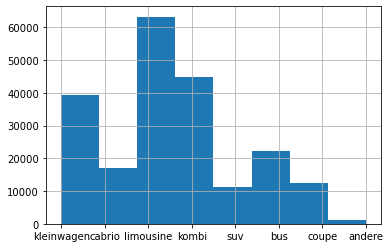

In [20]:
auto_data_copy.vehicleType.hist(bins = vehicle_bins)

In [21]:
group = auto_data_copy.groupby('brand')
brand_bins = len(group.sum())
group.sum()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
brand,,,,,,
alfa_romeo,7584570,2713775,197459,168610000,8209,74912278
audi,244529877,44742387,3846760,2804515000,142964,1235234838
bmw,272526818,55148877,4956457,3602150000,173489,1548566340
chevrolet,9213131,2410694,175862,116525000,7213,58751557
chrysler,4306626,1563906,136400,103035000,5179,40137335
citroen,13680675,5768834,295854,330730000,18188,143477558
dacia,4154954,1359002,60219,57555000,4478,35490241
daewoo,257812,336447,14355,19605000,1260,8095416
daihatsu,874395,559326,21325,29600000,1904,14051414


<AxesSubplot:>

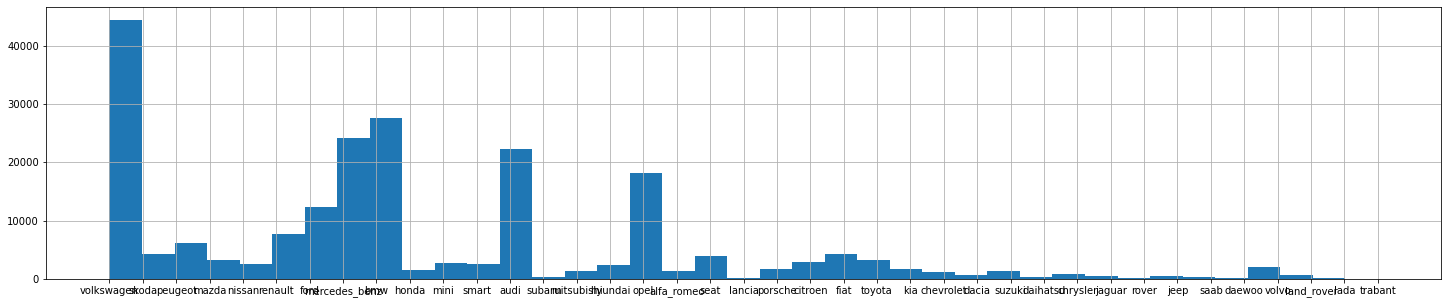

In [31]:
auto_data_copy.brand.hist(bins = brand_bins, figsize=(25,5))

# Задание 6: Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [23]:
auto_data_copy['nameLenght'] = [len(i) for i in auto_data_copy['name']]
auto_data_copy

C:\Users\PAVEL_~1\AppData\Local\Temp/ipykernel_8208/3214562321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_data_copy['nameLenght'] = [len(i) for i in auto_data_copy['name']]


,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,nameLenght
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,18
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,30
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,27
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,17
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,57290,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371517,2016-03-28 13:48:07,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,manuell,140,golf,150000,7,diesel,volkswagen,nein,2016-03-28 00:00:00,75223,32
371520,2016-03-19 19:53:49,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,96465,12
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,26135,37
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,87439,34


# Задание 7: Постройте карту корреляций между признаками. Выведите также числовые значения признаков.

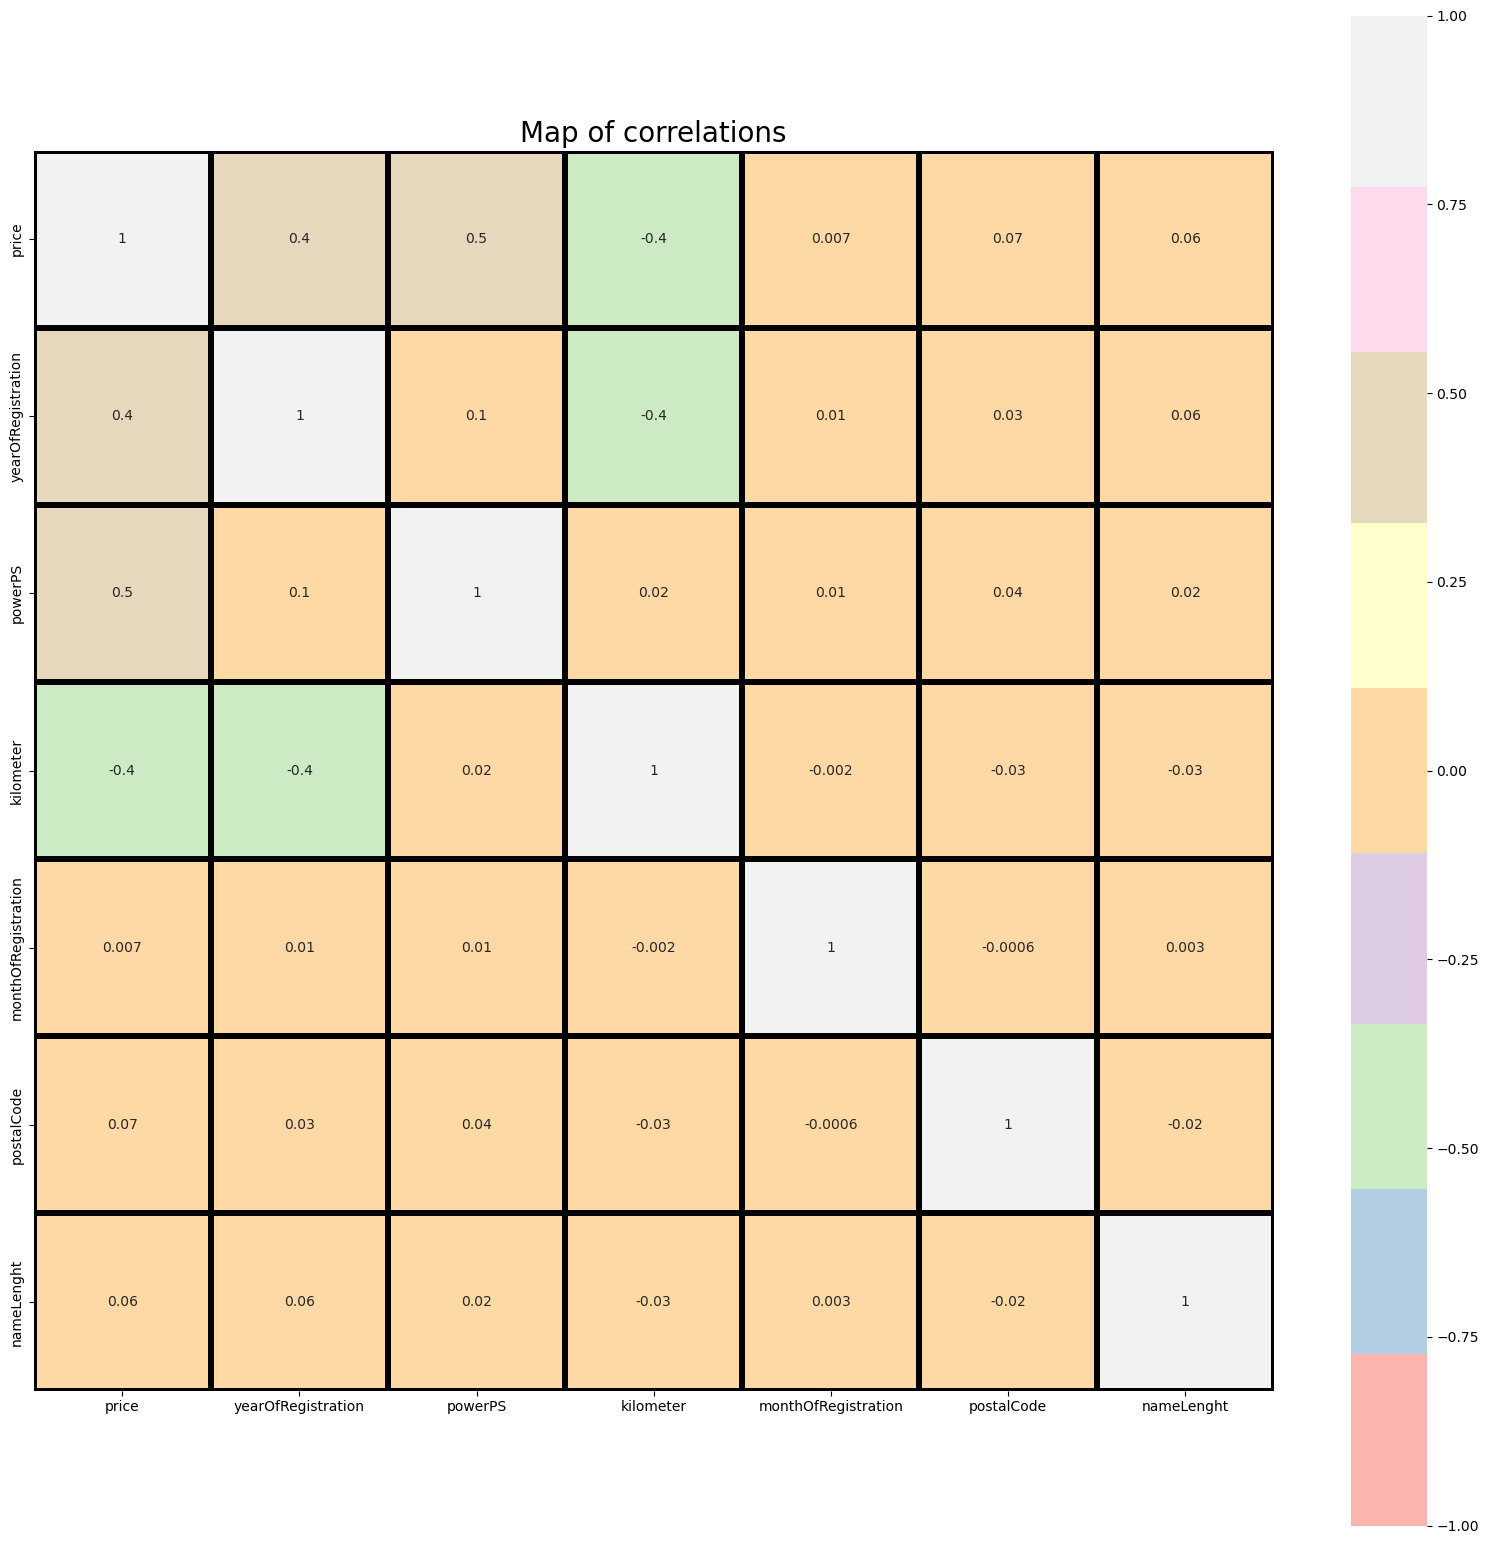

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode,nameLenght
price,1.000000,0.385090,0.512535,-0.435500,0.007246,0.065736,0.058015
yearOfRegistration,0.385090,1.000000,0.102335,-0.429560,0.009783,0.029471,0.059298
powerPS,0.512535,0.102335,1.000000,0.020962,0.012536,0.044621,0.024647
kilometer,-0.435500,-0.429560,0.020962,1.000000,-0.002424,-0.029769,-0.032996
monthOfRegistration,0.007246,0.009783,0.012536,-0.002424,1.000000,-0.000581,0.003365
postalCode,0.065736,0.029471,0.044621,-0.029769,-0.000581,1.000000,-0.018339
nameLenght,0.058015,0.059298,0.024647,-0.032996,0.003365,-0.018339,1.000000


In [34]:
plt.figure(figsize=(20,20), dpi= 100)
sns.heatmap(auto_data_copy.corr(), annot = True,  fmt='.1g', xticklabels=auto_data_copy.corr().columns, yticklabels=auto_data_copy.corr().columns, vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black', square=True, cmap='Pastel1')
plt.title('Map of correlations', fontsize=20)
plt.show()
auto_data_copy.corr()

# Задание 8: Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.

Pearson correlation coefficient:  (-0.005857759378240003, 0.006992423183053796)
Spearman correlation coefficient:  0.04177798268344568
p-value: 1.557458407475175e-82
The result is normal.


<AxesSubplot:ylabel='Density'>

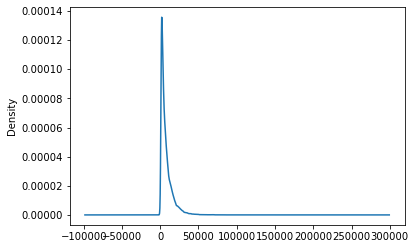

In [37]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
vehicleType = pd.Series(label_encoder.fit_transform(auto_data_copy['vehicleType']))
pearson = stats.pearsonr(auto_data_copy['price'], vehicleType)
spearman = stats.spearmanr(auto_data_copy['price'], vehicleType)

print("Pearson correlation coefficient: ", pearson)
print("Spearman correlation coefficient: ", spearman.correlation)
print("p-value:", spearman.pvalue)

if (spearman.pvalue<0.02): print("The result is normal.")
else: print("The result is random!")
    
density = pd.Series(auto_data_copy['price'])
density.plot.kde()

# Задание 9: Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [26]:
auto_data_copy['vehicleModel'] = [n for n in (auto_data_copy['vehicleType'] + " " + auto_data_copy['model']) ]
auto_data_copy

C:\Users\PAVEL_~1\AppData\Local\Temp/ipykernel_8208/1702874290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_data_copy['vehicleModel'] = [n for n in (auto_data_copy['vehicleType'] + " " + auto_data_copy['model']) ]


,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,nameLenght,vehicleModel
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,18,kleinwagen golf
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,30,kleinwagen fabia
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,27,cabrio 2_reihe
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,17,limousine 3_reihe
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,57290,45,kombi passat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371517,2016-03-28 13:48:07,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,manuell,140,golf,150000,7,diesel,volkswagen,nein,2016-03-28 00:00:00,75223,32,limousine golf
371520,2016-03-19 19:53:49,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,96465,12,limousine leon
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,26135,37,cabrio fortwo
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,87439,34,bus transporter
